Name: Feifan Gu /
Github Username: Feifan126 /
USC ID: 8135699631

#### 1. Time Series Classification Part 1: Feature Creation/Extraction

(a) Download the AReM data

In [1]:
import os
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

dataset = "../data/"
activity_folders = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]
columns = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,
2, and 3 in other folders as test data and other datasets as train data

In [57]:
def split_train_test(data_path):
    train, test = [], []
    
    for root, _, files in os.walk(data_path):
        activity = os.path.basename(root)
        
        for file in files:
            if file.endswith(".csv"):
                df = pd.read_csv(os.path.join(root, file), header=None, skiprows=4, on_bad_lines='skip',sep=',')
                df.columns = columns
                df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x) 
                df = df.apply(pd.to_numeric, errors='coerce')
                df['activity'] = activity
                csv_idx = int(re.findall(r'\d+', file)[0])
                if csv_idx <= 2 or (activity not in ['bending1', 'bending2'] and csv_idx == 3):
                    test.append(df)
                else:
                    train.append(df)
                    
    return train, test

train_data, test_data = split_train_test(dataset)

(c) Feature Extraction

i. Research what types of time-domain features are usually used in time series
classification and list them

Basic Statistical Features  
These features capture fundamental properties of the signal.  
Mean (𝜇) – The average value of the time series.  
Minimum (𝑋𝑚𝑖𝑛​) – The smallest value in the time series.  
Maximum (𝑋𝑚𝑎𝑥) – The largest value in the time series.  
Range (𝑋𝑚𝑎𝑥−𝑋𝑚𝑖𝑛) – The difference between max and min.  
Median – The middle value of the time series when sorted.  
Mode – The most frequently occurring value.  

Dispersion & Variability Features  
These features measure the spread and variability in the data.  
Variance (𝜎2) – Measures the spread of the data.  
Standard Deviation (STD) – The square root of the variance.  
Interquartile Range (IQR) – The range between the 25th and 75th percentiles.  
Mean Absolute Deviation (MAD) – The average of the absolute differences from the mean.  
Coefficient of Variation (CV) – The ratio of the standard deviation to the mean.  

Shape-Based Features  
These features describe the shape and distribution of the time series.  
Skewness – Measures the asymmetry of the distribution.  
Kurtosis – Measures the "tailedness" of the distribution.  
Slope – The rate of change over time.  
Zero Crossing Rate – Number of times the signal crosses zero.  

Peak & Energy Features  
These features analyze signal peaks and amplitude variations.  
Root Mean Square (RMS) – Measures signal energy.  
Peak-to-Peak (P2P) – Difference between max and min values.  
Crest Factor – Ratio of the max absolute value to the RMS.  
Energy – Sum of squared values.  
Signal Magnitude Area (SMA) – Sum of absolute values.  

Temporal & Dynamic Features  
These features capture changes over time.  
Autocorrelation – Measures how similar the time series is to a lagged version of itself.  
Lag-1 Autocorrelation – Measures correlation with previous value.  
Slope Sign Changes – Counts the number of times the slope changes sign.  
Entropy – Measures the randomness of the signal.  
Hjorth Parameters:  
Activity – Signal variance.  
Mobility – Standard deviation of the first derivative.  
Complexity – Changes in frequency patterns.  

Histogram-Based Features  
These features are derived from histogram distributions.  
Histogram Bins – Splitting the data into bins and counting occurrences.  
Mode Count – The number of times the most frequent value appears.

ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series
in each instance.

In [3]:
def extract_features(df):
    features = {}
    for col in columns[1:]:
        features[f'{col}_min'] = df[col].min()
        features[f'{col}_max'] = df[col].max()    
        features[f'{col}_mean'] = df[col].mean()
        features[f'{col}_median'] = df[col].median()
        features[f'{col}_std'] = df[col].std()
        features[f'{col}_1st_quantile'] = df[col].quantile(0.25)
        features[f'{col}_3rd_quantile'] = df[col].quantile(0.75)
    return features

train_features =pd.DataFrame([extract_features(df) for df in train_data])
test_features = pd.DataFrame([extract_features(df) for df in test_data])
all_features = pd.concat([train_features, test_features], ignore_index=True)

In [4]:
new_columns = {
    "avg_rss12_min": "min1", "avg_rss12_max": "max1", "avg_rss12_mean": "mean1", "avg_rss12_median": "median1",
    "avg_rss12_std": "std1", "avg_rss12_1st_quantile": "1st quart1", "avg_rss12_3rd_quantile": "3rd quart1",
    "var_rss12_min": "min2", "var_rss12_max": "max2", "var_rss12_mean": "mean2", "var_rss12_median": "median2",
    "var_rss12_std": "std2", "var_rss12_1st_quantile": "1st quart2", "var_rss12_3rd_quantile": "3rd quart2",
    "avg_rss13_min": "min3", "avg_rss13_max": "max3", "avg_rss13_mean": "mean3", "avg_rss13_median": "median3",
    "avg_rss13_std": "std3", "avg_rss13_1st_quantile": "1st quart3", "avg_rss13_3rd_quantile": "3rd quart3",
    "var_rss13_min": "min4", "var_rss13_max": "max4", "var_rss13_mean": "mean4", "var_rss13_median": "median4",
    "var_rss13_std": "std4", "var_rss13_1st_quantile": "1st quart4", "var_rss13_3rd_quantile": "3rd quart4",
    "avg_rss23_min": "min5", "avg_rss23_max": "max5", "avg_rss23_mean": "mean5", "avg_rss23_median": "median5",
    "avg_rss23_std": "std5", "avg_rss23_1st_quantile": "1st quart5", "avg_rss23_3rd_quantile": "3rd quart5",
    "var_rss23_min": "min6", "var_rss23_max": "max6", "var_rss23_mean": "mean6", "var_rss23_median": "median6",
    "var_rss23_std": "std6", "var_rss23_1st_quantile": "1st quart6", "var_rss23_3rd_quantile": "3rd quart6"
}

all_features.rename(columns=new_columns, inplace=True)
all_features = all_features.reset_index(drop=True) 
all_features.index = all_features.index + 1 
all_features.index.name = 'instance' 

print(all_features)

           min1   max1      mean1  median1      std1  1st quart1  3rd quart1  \
instance                                                                       
1         36.25  48.00  43.969125   44.500  1.618364       43.31     44.6700   
2         37.00  48.00  43.454958   43.250  1.386098       42.50     45.0000   
3         33.00  47.75  42.179813   43.500  3.670666       39.15     45.0000   
4         33.00  45.75  41.678063   41.750  2.243490       41.33     42.7500   
5         35.00  47.40  43.954500   44.330  1.558835       43.00     45.0000   
...         ...    ...        ...      ...       ...         ...         ...   
84        24.75  48.33  44.182937   48.000  7.495615       48.00     48.0000   
85        48.00  48.25  48.004167   48.000  0.032038       48.00     48.0000   
86        24.25  45.00  37.177042   36.250  3.581301       34.50     40.2500   
87        28.75  44.75  37.561187   36.875  3.226507       35.25     40.2500   
88        22.00  44.67  37.058708   36.0

iii. Estimate the standard deviation of each of the time-domain features you
extracted from the data.

In [5]:
train_features.rename(columns=new_columns, inplace=True)
test_features.rename(columns=new_columns, inplace=True)

In [6]:
stds1 = train_features.std()
print('standard deviation for train features:', '\n', stds1)
stds2 = test_features.std()
print('standard deviation for test features:', '\n', stds2)
stds3 = all_features.std()
print('standard deviation for all features:', '\n', stds3)

standard deviation for train features: 
 min1          8.856393
max1          4.192017
mean1         4.825351
median1       4.872952
std1          1.757164
1st quart1    5.690502
3rd quart1    4.622275
min2          0.000000
max2          5.144249
mean2         1.605203
median2       1.438386
std2          0.905071
1st quart2    0.954504
3rd quart2    2.165661
min3          3.052281
max3          4.687709
mean3         3.821131
median3       3.809429
std3          1.003087
1st quart3    4.099894
3rd quart3    3.919557
min4          0.000000
max4          2.302288
mean4         1.182739
median4       1.153896
std4          0.474327
1st quart4    0.843928
3rd quart4    1.570131
min5          5.343307
max5          5.489320
mean5         5.149689
median5       5.299754
std5          1.042442
1st quart5    5.568136
3rd quart5    4.993026
min6          0.052145
max6          2.559028
mean6         1.174397
median6       1.108818
std6          0.518618
1st quart6    0.778097
3rd quart6    1.

In [7]:
from sklearn.utils import resample

def bootstrap(data, num_iterations=1000, alpha=0.1):
    bootstrapped_stds = []
    
    for _ in range(num_iterations):
        sample = resample(data, replace=True, n_samples=len(data))
        bootstrapped_stds.append(sample.std())
    
    lower = np.percentile(bootstrapped_stds, 100 * alpha / 2)
    upper = np.percentile(bootstrapped_stds, 100 * (1 - alpha / 2))
    
    return lower, upper

ci_results = train_features.apply(lambda x: bootstrap(x))

for feature, ci in ci_results.items():
    print(f'{feature} 90% CI for Standard Deviation: {ci}')

min1 90% CI for Standard Deviation: 0     7.643869
1    10.084170
Name: min1, dtype: float64
max1 90% CI for Standard Deviation: 0    2.989504
1    5.183699
Name: max1, dtype: float64
mean1 90% CI for Standard Deviation: 0    4.264405
1    5.344852
Name: mean1, dtype: float64
median1 90% CI for Standard Deviation: 0    4.240573
1    5.405594
Name: median1, dtype: float64
std1 90% CI for Standard Deviation: 0    1.541158
1    1.928759
Name: std1, dtype: float64
1st quart1 90% CI for Standard Deviation: 0    5.087063
1    6.170426
Name: 1st quart1, dtype: float64
3rd quart1 90% CI for Standard Deviation: 0    3.749774
1    5.363914
Name: 3rd quart1, dtype: float64
min2 90% CI for Standard Deviation: 0    0.0
1    0.0
Name: min2, dtype: float64
max2 90% CI for Standard Deviation: 0    4.634507
1    5.519773
Name: max2, dtype: float64
mean2 90% CI for Standard Deviation: 0    1.401996
1    1.754116
Name: mean2, dtype: float64
median2 90% CI for Standard Deviation: 0    1.251569
1    1.5731

iv. Use your judgement to select the three most important time-domain features.

In [8]:
train_features['label'] = [df.iloc[0]['activity'] for df in train_data]
bending_train = pd.DataFrame(train_features)
bending_train.loc[bending_train['label'].isin(['bending1', 'bending2']), 'label'] = 1
bending_train.loc[bending_train['label'] != 1, 'label'] = 0
print(bending_train)

     min1   max1      mean1  median1      std1  1st quart1  3rd quart1  min2  \
0   36.25  48.00  43.969125    44.50  1.618364      43.310       44.67   0.0   
1   37.00  48.00  43.454958    43.25  1.386098      42.500       45.00   0.0   
2   33.00  47.75  42.179813    43.50  3.670666      39.150       45.00   0.0   
3   33.00  45.75  41.678063    41.75  2.243490      41.330       42.75   0.0   
4   35.00  47.40  43.954500    44.33  1.558835      43.000       45.00   0.0   
..    ...    ...        ...      ...       ...         ...         ...   ...   
64  18.50  44.25  35.752354    36.00  4.614802      33.000       39.33   0.0   
65  24.25  45.00  37.177042    36.25  3.581301      34.500       40.25   0.0   
66  23.33  43.50  36.248768    36.75  3.824632      33.415       39.25   0.0   
67  26.25  44.25  36.957458    36.29  3.434863      34.500       40.25   0.0   
68  27.75  44.67  37.142359    36.33  3.762442      34.000       40.50   0.0   

     max2     mean2  ...  1st quart5  3

/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_98848/203813933.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(bending_train.loc[bending_train['label'] == 1, f + str(i)],
/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_98848/203813933.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(bending_train.loc[bending_train['label'] == 0, f + str(i)],
/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_98848/203813933.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(bending_train.loc[bending_train['label'] == 1, f + str(i)],
/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_98848/203813933.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable 

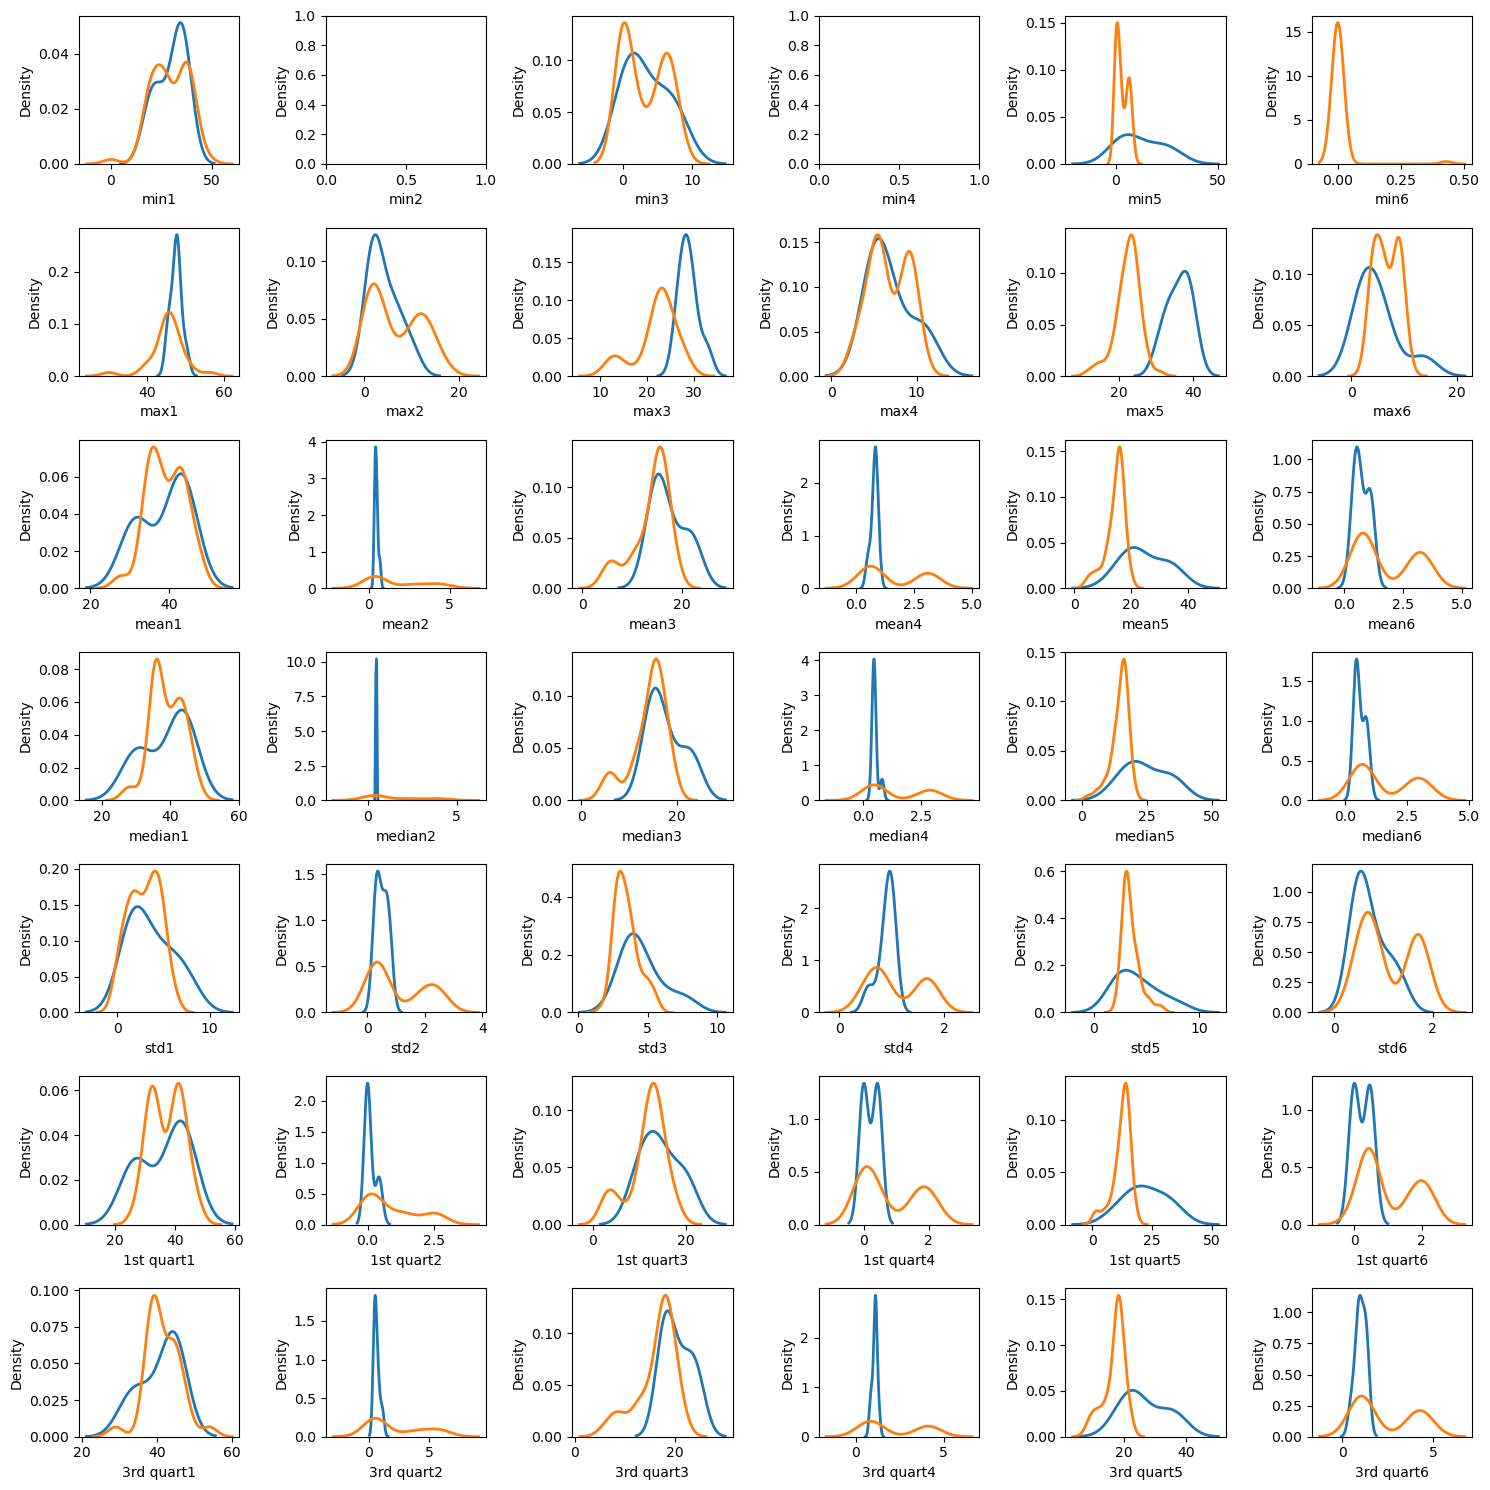

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['min', 'max', 'mean', 'median', 'std', '1st quart', '3rd quart']

fig, axes = plt.subplots(7, 6, figsize=(15, 15))

for i in range(1, 7):
    for j, f in enumerate(features):
        sns.kdeplot(bending_train.loc[bending_train['label'] == 1, f + str(i)], 
                    ax=axes[j, i-1], label='Bending', linewidth=2)
        sns.kdeplot(bending_train.loc[bending_train['label'] == 0, f + str(i)], 
                    ax=axes[j, i-1], label='Not Bending', linewidth=2)
        
plt.tight_layout()
plt.show()

Since we are doing classification, a clear and easier dicision boundary is better. So the three most important time-domain features are max, mean, and 3rd quart.

#### 2. Time Series Classification Part 2: Binary and Multiclass Classification

(a) Binary Classification Using Logistic Regression

i. Assume that you want to use the training set to classify bending from other
activities, i.e. you have a binary classification problem. Depict scatter plots
of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of
each instance, and use color to distinguish bending vs. other activities.

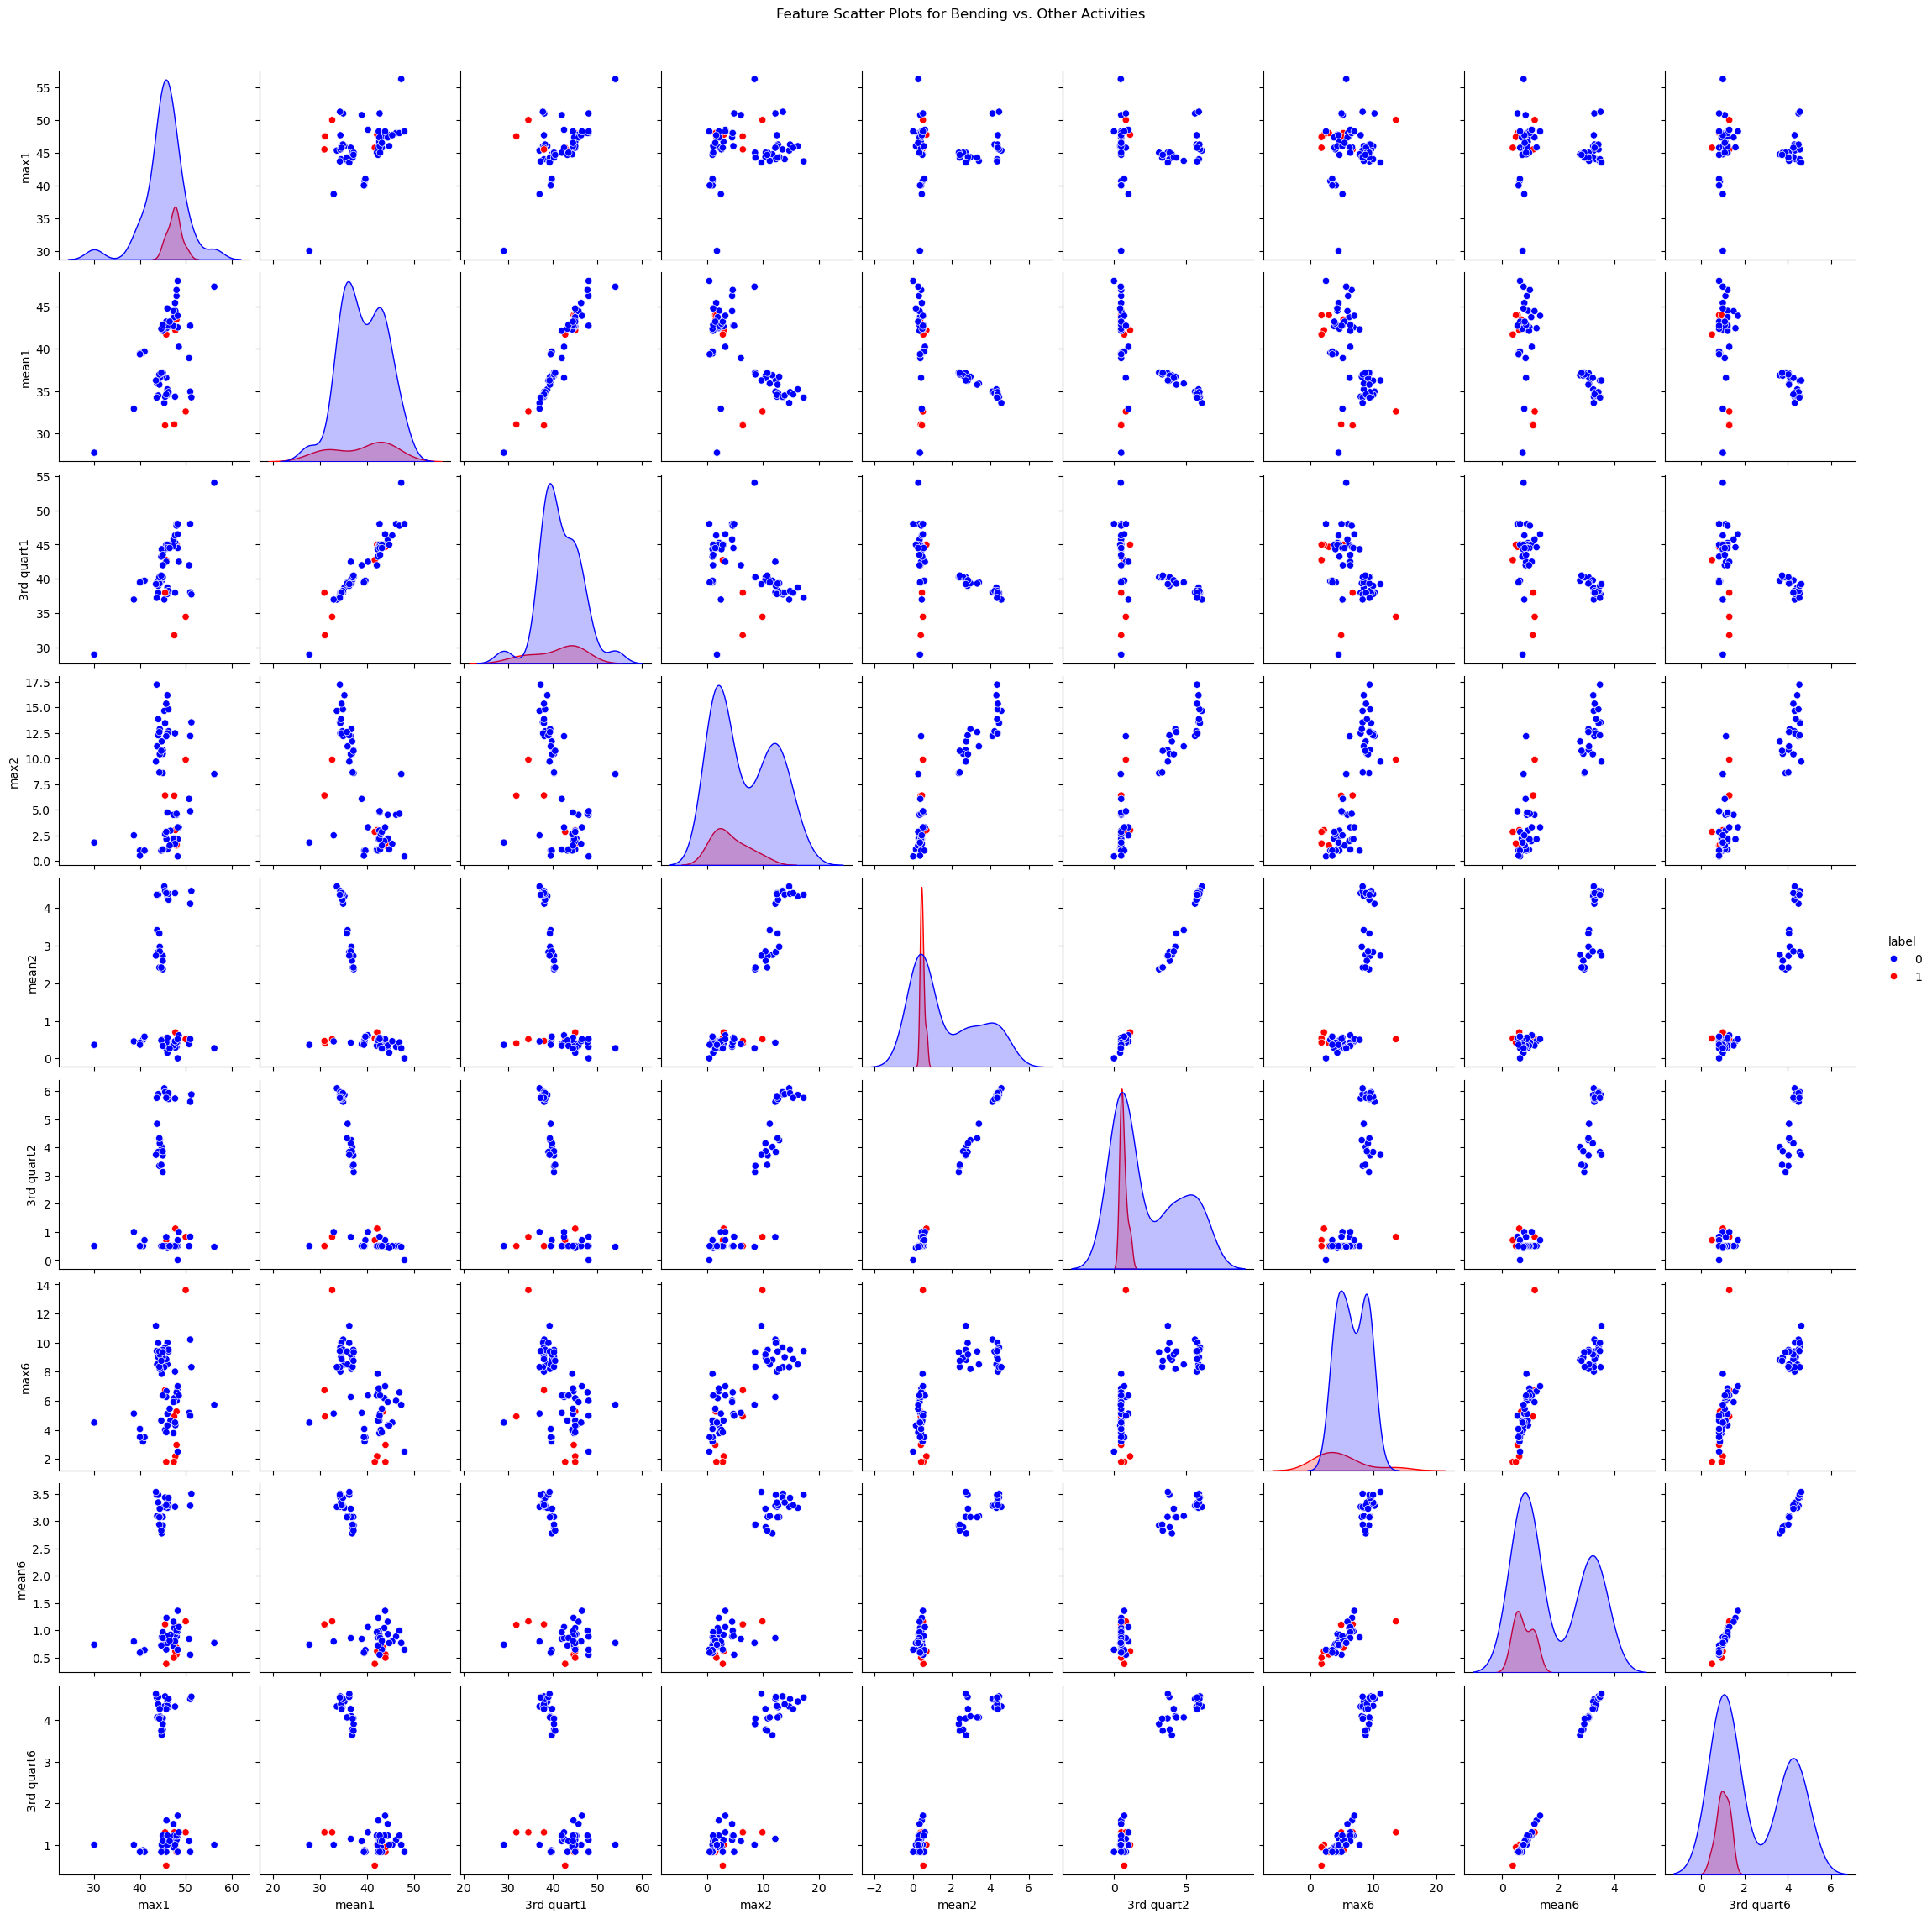

In [10]:
train_features['activity'] = [train_features['activity'].iloc[0] for train_features in train_data]
train_features['label'] = train_features['activity'].apply(lambda x: 1 if 'bending' in x.lower() else 0)

selected_features = ['max1', 'mean1', '3rd quart1', 'max2', 'mean2', '3rd quart2', 'max6', 'mean6', '3rd quart6']

sns.pairplot(train_features, vars=selected_features, hue="label", palette={1: 'red', 0: 'blue'})
plt.suptitle("Feature Scatter Plots for Bending vs. Other Activities", y=1.02)
plt.show()

ii. Break each time series in your training set into two (approximately) equal
length time series. Now instead of 6 time series for each of the training
instances, you have 12 time series for each training instance. Repeat the
experiment in 2(a)i, i.e depict scatter plots of the features extracted from both
parts of the time series 1,2, and 6. Do you see any considerable diﬀerence in
the results with those of 2(a)i?

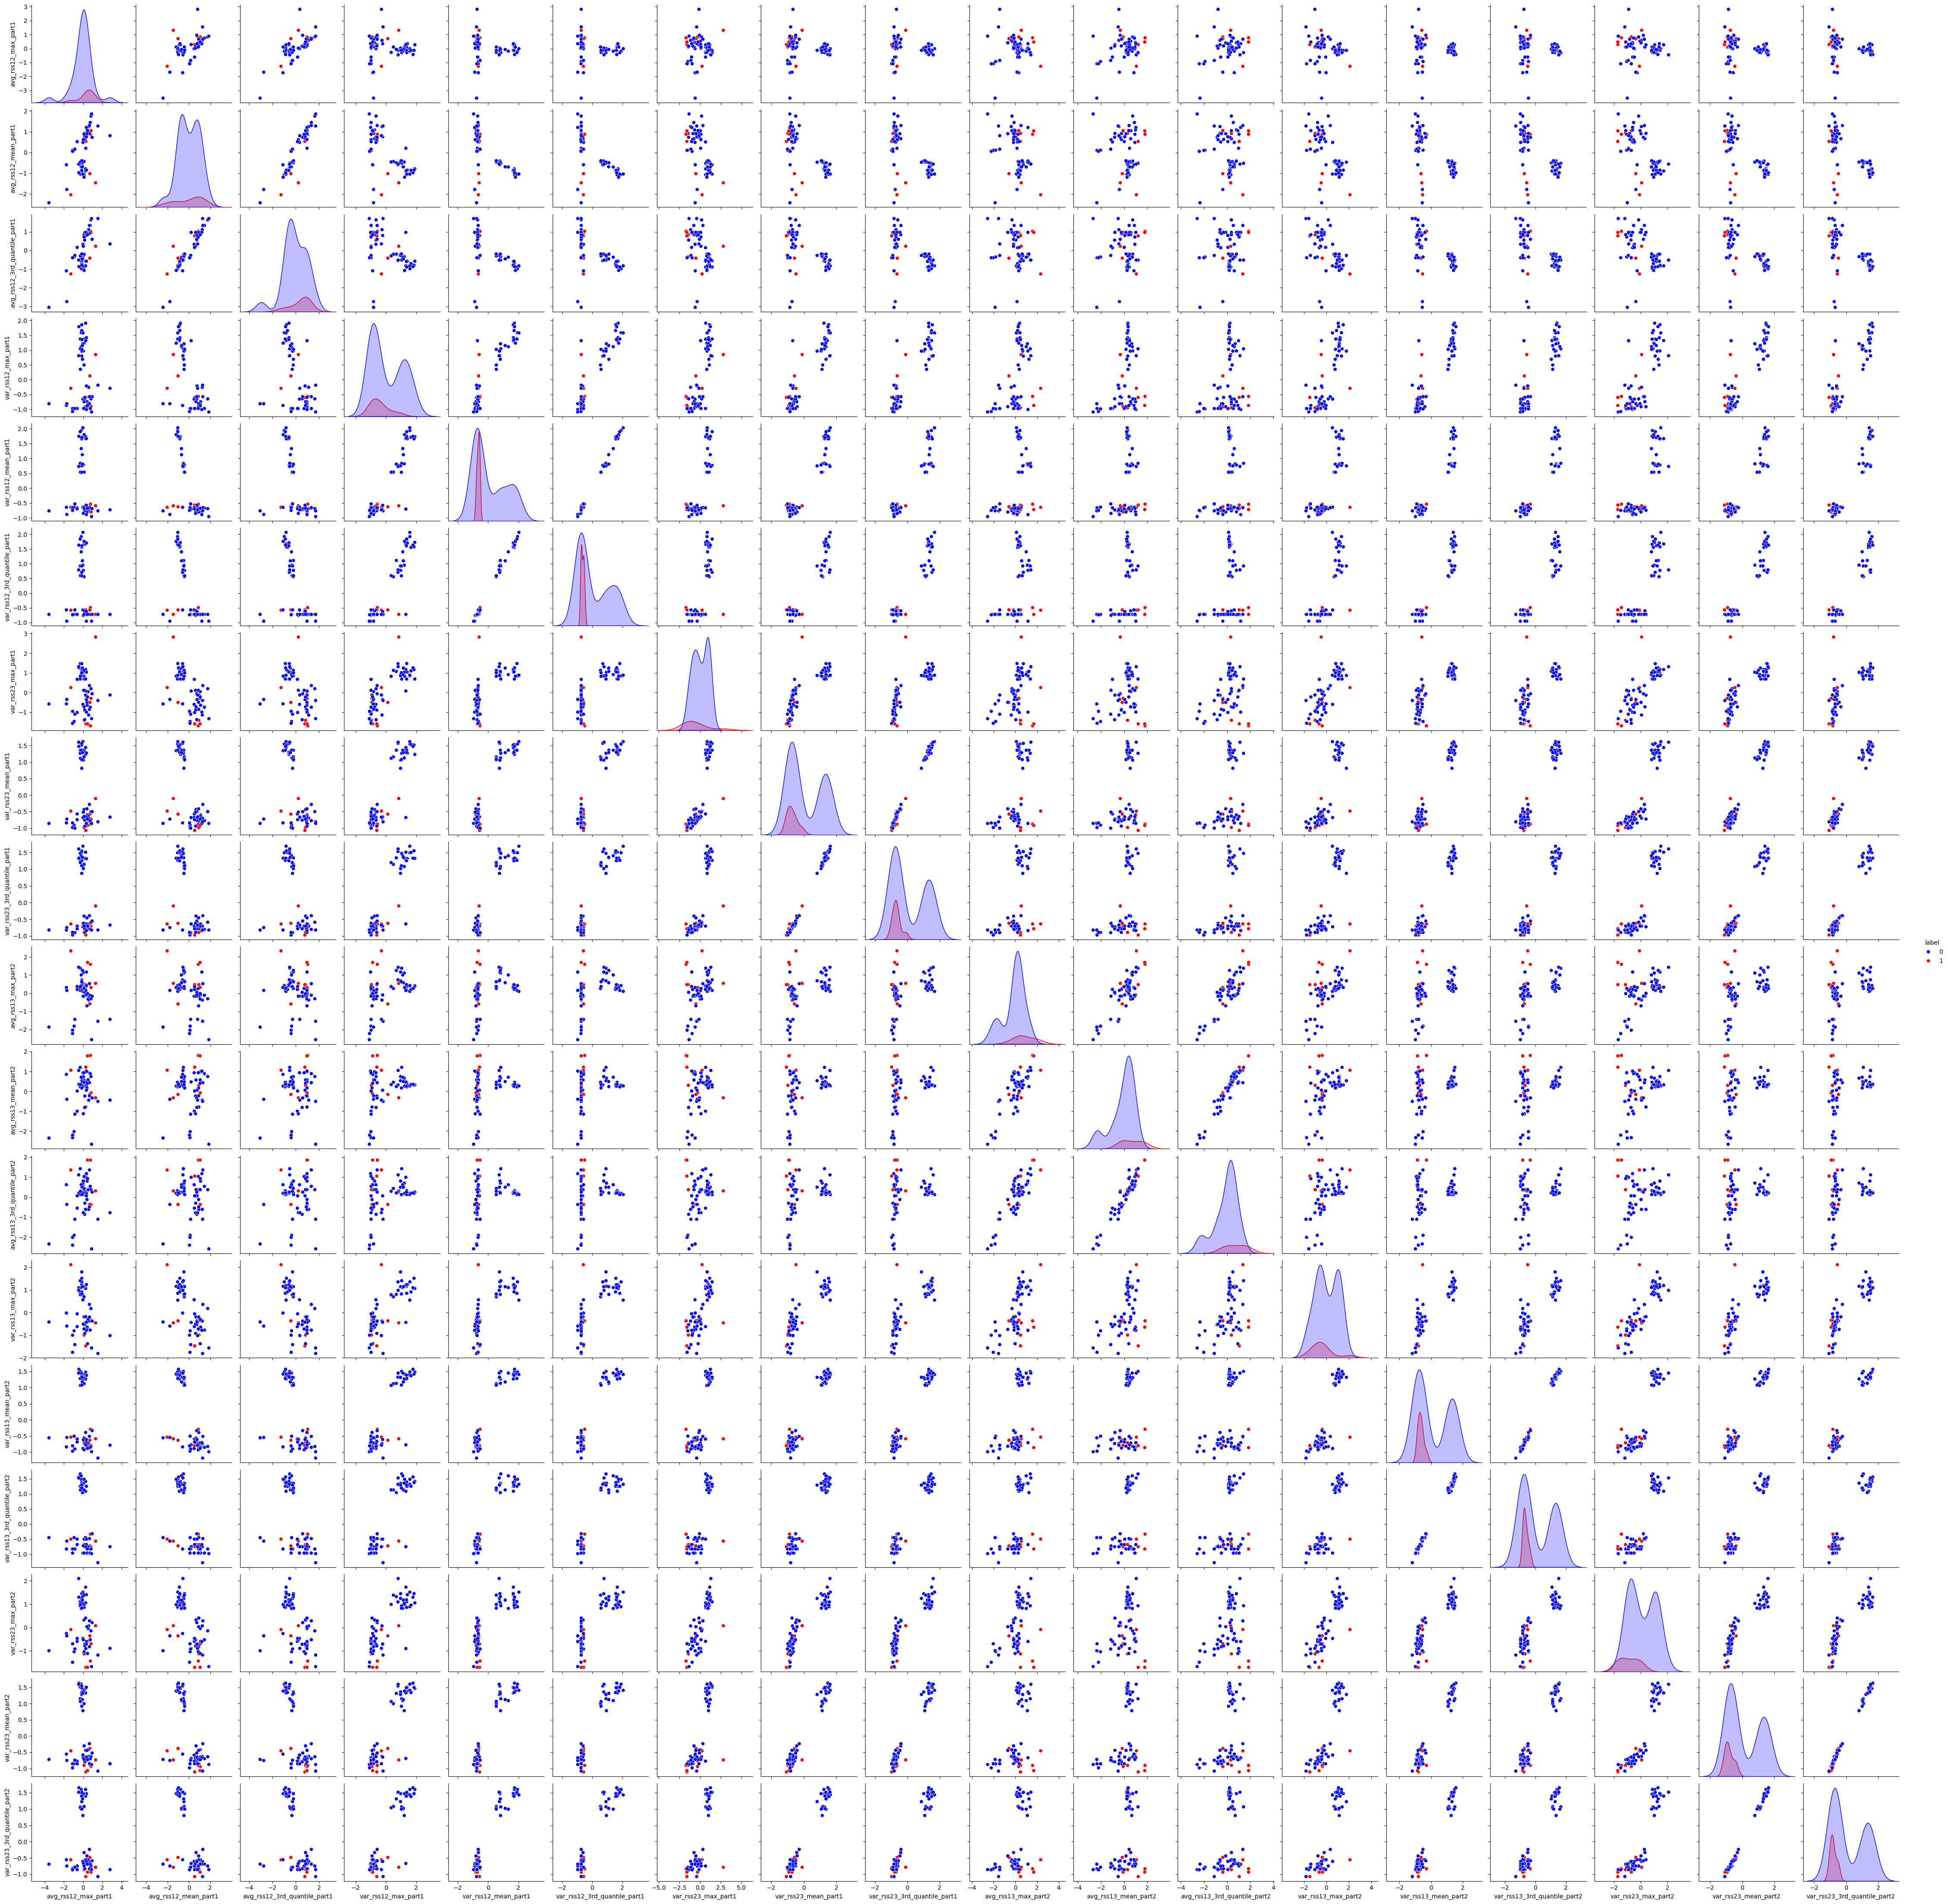

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Function to extract features from time series
def extract_features(df):
    features = {}
    for col in ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']:
        features[f'{col}_min'] = df[col].min()
        features[f'{col}_max'] = df[col].max()
        features[f'{col}_mean'] = df[col].mean()
        features[f'{col}_median'] = df[col].median()
        features[f'{col}_std'] = df[col].std()
        features[f'{col}_1st_quantile'] = df[col].quantile(0.25)
        features[f'{col}_3rd_quantile'] = df[col].quantile(0.75)
    return features

# Function to split time series into two parts and extract features
def split_and_extract_features(df):
    split_idx = len(df) // 2  # Find midpoint
    df1, df2 = df.iloc[:split_idx], df.iloc[split_idx:]
    
    features1 = extract_features(df1)
    features2 = extract_features(df2)
    
    new_features = {}
    for key in features1.keys():
        new_features[key + '_part1'] = features1[key]
        new_features[key + '_part2'] = features2[key]
    
    return new_features

# Apply feature extraction on split data
split_train_features = pd.DataFrame([split_and_extract_features(df) for df in train_data])
split_train_features['label'] = [df['activity'].iloc[0] for df in train_data]
split_train_features.loc[split_train_features['label'].isin(['bending1', 'bending2']), 'label'] = 1
split_train_features.loc[split_train_features['label'] != 1, 'label'] = 0

# Standardize data
scaler = StandardScaler()
features = ['min', 'max', 'mean', 'median', 'std', '1st_quantile', '3rd_quantile']
selected_features = [f'{ts}_{f}' for ts in ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'] for f in features]
selected_features_part1 = [f + '_part1' for f in selected_features]
selected_features_part2 = [f + '_part2' for f in selected_features]

# Concatenate part1 and part2 horizontally
data_combined = pd.concat([split_train_features[selected_features_part1], split_train_features[selected_features_part2]], axis=1)
labels = split_train_features['label']
data_combined['label'] = labels

data_combined_scaled = scaler.fit_transform(data_combined.iloc[:, :-1])
data_combined = pd.DataFrame(data_combined_scaled, columns=selected_features_part1 + selected_features_part2)
data_combined['label'] = labels

selected_features = ['avg_rss12_max_part1', 'avg_rss12_mean_part1', 'avg_rss12_3rd_quantile_part1',
                     'var_rss12_max_part1', 'var_rss12_mean_part1', 'var_rss12_3rd_quantile_part1',
                     'var_rss23_max_part1', 'var_rss23_mean_part1', 'var_rss23_3rd_quantile_part1',
                     'avg_rss13_max_part2', 'avg_rss13_mean_part2', 'avg_rss13_3rd_quantile_part2',
                     'var_rss13_max_part2', 'var_rss13_mean_part2', 'var_rss13_3rd_quantile_part2',
                     'var_rss23_max_part2', 'var_rss23_mean_part2', 'var_rss23_3rd_quantile_part2']
sns.pairplot(data_combined, vars= selected_features, hue="label", palette={1: 'red', 0: 'blue'})
plt.show()

We can observe more distinct red points than before, yet the overall image remains similar.

iii. Break each time series in your training set into l ∈{1,2,...,20}time series
of approximately equal length and use logistic regression5 to solve the binary
classification problem, using time-domain features.

In [21]:
# Clean data
train_data_clean = [df.dropna() for df in train_data]

# Digitize labels
def digitize_labels(df):
    label_mapping = {'bending1': 1, 'bending2': 1, 'cycling': 0, 'lying': 0, 
                     'sitting': 0, 'standing': 0, 'walking': 0}
    df['label'] = df['activity'].map(label_mapping)
    return df

train_data_digitized = [digitize_labels(df) for df in train_data_clean]

def extract_features(df):
    features = {}
    for col in df.columns:
        if col not in ['time', 'activity', 'label']:
            features[f'{col}_min'] = df[col].min()
            features[f'{col}_max'] = df[col].max()
            features[f'{col}_mean'] = df[col].mean()
            features[f'{col}_median'] = df[col].median()
            features[f'{col}_std'] = df[col].std()
            features[f'{col}_1st_quantile'] = df[col].quantile(0.25)
            features[f'{col}_3rd_quantile'] = df[col].quantile(0.75)
    return features

def split_and_extract_features(df, l):
    df_numeric = df.drop(columns=['time', 'activity', 'label'], errors='ignore')
    split_len = len(df_numeric) // l
    features = {}
    for i in range(l):
        start_idx = i * split_len
        end_idx = (i + 1) * split_len if i < l - 1 else len(df_numeric)
        df_part = df_numeric.iloc[start_idx:end_idx]
        part_features = extract_features(df_part)
        for key, value in part_features.items():
            features[f'{key}_part{i+1}'] = value
    extracted_features = pd.DataFrame([features])
    # Safely assign the label: if the 'label' column exists and has at least one row, use its first value;
    # otherwise, assign NaN.
    if 'label' in df.columns and len(df['label']) > 0:
        extracted_features['label'] = df['label'].iloc[0]
    else:
        extracted_features['label'] = np.nan
    return extracted_features

/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_98848/3156335098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['activity'].map(label_mapping)
/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_98848/3156335098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['activity'].map(label_mapping)
/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_98848/3156335098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [29]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np

best_score = 0
best_l, best_p = 0, 0

for l in range(1, 21):
    # Extract features for l segments
    X_list = []
    y_list = []
    for df in train_data_digitized:
        features_df = split_and_extract_features(df, l)
        # Only append if a valid label exists
        if pd.isna(features_df['label'].iloc[0]):
            continue
        X_list.append(features_df.drop(columns=['label'], errors='ignore'))
        y_list.append(features_df['label'].iloc[0])
    
    X = pd.concat(X_list, axis=0, ignore_index=True)
    y = pd.Series(y_list)
    
    # # (Optionally, you can double-check the sizes)
    # print(f"For l = {l}: X.shape = {X.shape}, y.shape = {y.shape}")
    
    # Skip if only one class exists
    if len(y.unique()) < 2:
        print(f"Skipping l={l} (single class)")
        continue
    
    # Use RFECV to find optimal p
    model = LogisticRegression(max_iter=1000)
    rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    pipeline = Pipeline([('feature_selection', rfecv), ('model', model)])
    
    # Stratified 5-fold cross-validation
    cv = StratifiedKFold(n_splits=5)
    scores = []
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    
    avg_score = np.mean(scores)
    optimal_p = rfecv.n_features_
    
    print(f"l={l}, Optimal p={optimal_p}, Accuracy={avg_score:.3f}")
    
    if avg_score > best_score:
        best_score = avg_score
        best_l = l
        best_p = optimal_p

print(f"Best parameters: l={best_l}, p={best_p}, Accuracy={best_score:.3f}")

l=1, Optimal p=1, Accuracy=0.971
l=2, Optimal p=2, Accuracy=0.942
l=3, Optimal p=1, Accuracy=0.985
l=4, Optimal p=1, Accuracy=0.956
l=5, Optimal p=1, Accuracy=0.942
l=6, Optimal p=2, Accuracy=0.942
l=7, Optimal p=1, Accuracy=0.942
l=8, Optimal p=1, Accuracy=0.913
l=9, Optimal p=2, Accuracy=0.927
l=10, Optimal p=28, Accuracy=0.942
l=11, Optimal p=2, Accuracy=0.941
l=12, Optimal p=7, Accuracy=0.913
l=13, Optimal p=1, Accuracy=0.985
l=14, Optimal p=1, Accuracy=0.985
l=15, Optimal p=1, Accuracy=0.970
l=16, Optimal p=1, Accuracy=0.985
l=17, Optimal p=1, Accuracy=0.913
l=18, Optimal p=1, Accuracy=0.942
l=19, Optimal p=3, Accuracy=0.942
l=20, Optimal p=2, Accuracy=0.956
Best parameters: l=3, p=1, Accuracy=0.985


Right Way:
Perform all preprocessing steps (time series segmentation, feature extraction, and feature selection) inside each fold of the cross-validation. Use stratified cross-validation to maintain class balance. This ensures that the test fold remains completely unseen during training, preventing any data leakage.

Wrong Way:
Performing any preprocessing or feature selection on the entire dataset before cross-validation. This causes information leakage, as the test data influences the model training, and can lead to overly optimistic performance estimates.

iv. Report the confusion matrix and show the ROC and AUC for your classifier
on train data. Report the parameters of your logistic regression βi’s as well
as the p-values associated with them.

Train Accuracy: 1.0
Confusion Matrix on Train Data:
[[60  0]
 [ 0  8]]
AUC on Train Data: 1.0


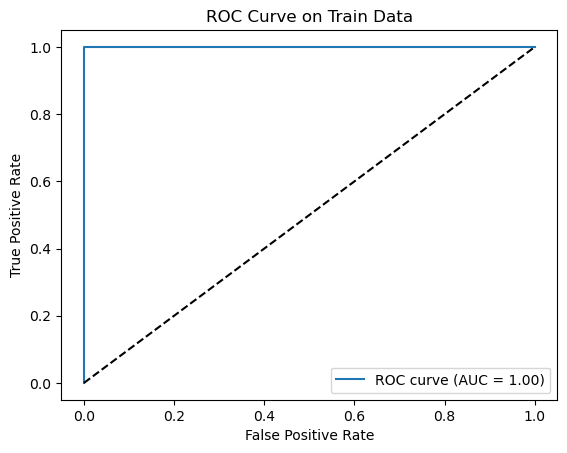

In [ ]:
X_train_list = []
y_train_list = []
for df in train_data_digitized:
    features_df = split_and_extract_features(df, 3) 
    if pd.isna(features_df['label'].iloc[0]):
        continue
    X_train_list.append(features_df.drop(columns=['label'], errors='ignore'))
    y_train_list.append(features_df['label'].iloc[0])

X_train = pd.concat(X_train_list, axis=0, ignore_index=True)
y_train = pd.Series(y_train_list)

model = LogisticRegression(max_iter=1000)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
pipeline = Pipeline([('feature_selection', rfecv), ('model', model)])
pipeline.fit(X_train, y_train)

y_pred_train = pipeline.predict(X_train)
y_prob_train = pipeline.predict_proba(X_train)[:, 1]

print("Train Accuracy:", np.mean(y_pred_train == y_train))  

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix on Train Data:")
print(cm)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)
auc_value = roc_auc_score(y_train, y_prob_train)
print("AUC on Train Data:", auc_value)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Train Data')
plt.legend(loc="lower right")
plt.show()


v. Test the classifier on the test set.

Test Accuracy: 0.8947368421052632
Cross-validation Accuracy (Training): 0.9846153846153847
Test Confusion Matrix:
[[15  0]
 [ 2  2]]
Test AUC: 0.8500000000000001


/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_98848/3156335098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['activity'].map(label_mapping)
/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_98848/3156335098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['activity'].map(label_mapping)
/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_98848/3156335098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

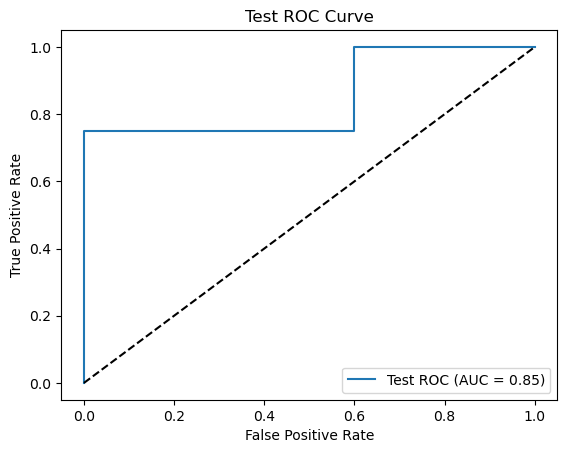

In [ ]:
# Preprocess test data
test_data_clean = [df.dropna() for df in test_data]
test_data_digitized = [digitize_labels(df) for df in test_data_clean]

X_test_list = []
y_test_list = []
for df in test_data_digitized:
    features_df = split_and_extract_features(df, best_l)
    if pd.isna(features_df['label'].iloc[0]):
        continue
    X_test_list.append(features_df.drop(columns=['label'], errors='ignore'))
    y_test_list.append(features_df['label'].iloc[0])

X_test_final = pd.concat(X_test_list, axis=0, ignore_index=True)
y_test_final = pd.Series(y_test_list)

y_test_pred = pipeline.predict(X_test_final)
y_test_prob = pipeline.predict_proba(X_test_final)[:, 1]  

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Test Accuracy
test_accuracy = accuracy_score(y_test_final, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Cross-validation Accuracy (Training):", best_score)

# Confusion Matrix on Test Data
cm_test = confusion_matrix(y_test_final, y_test_pred)
print("Test Confusion Matrix:")
print(cm_test)

# ROC Curve and AUC on Test Data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_final, y_test_prob)
auc_test = roc_auc_score(y_test_final, y_test_prob)
print("Test AUC:", auc_test)

plt.figure()
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve')
plt.legend(loc="lower right")
plt.show()

vi. Do your classes seem to be well-separated to cause instability in calculating
logistic regression parameters?

My classes seem to be extremely well-separated in the training data, which could cause instability in calculating logistic regression parameters.  
The training results show perfect separation on the training set (accuracy = 1.0, AUC = 1.0, and a confusion matrix with no misclassifications), which is a strong indicator that the classes are very well separated in the training data. While this high separation often seems desirable, it can lead to issues when estimating logistic regression parameters. In cases of complete or quasi-complete separation, the maximum likelihood estimates for the coefficients may become very large (or even diverge), causing numerical instability and overfitting.  
Although cross-validation accuracy is very high (around 98.5%), the test set performance drops (accuracy ≈ 89.5%, AUC = 0.85), which might be an indication that the perfect separation in the training data does not generalize well. This situation suggests that the classes are so well-separated in the training set that the logistic regression parameters might indeed be unstable, particularly if the model is extended with more features or different data.

vii. From the confusion matrices you obtained, do you see imbalanced classes?

From the confusion matrices, we can see that the number of negative samples in the training set far exceeds that of positive samples (for example, 60:8), and a similar imbalance exists in the test set (15:4). This indicates a class imbalance issue, which may lead the model to be biased toward predicting the majority class and thus affect its generalizability and interpretability.

Original training set sample count: 68
Number of positive samples: 8
Number of negative samples: 60
Balanced training set sample count: 16
Number of positive samples (balanced): 8
Number of negative samples (balanced): 8
Balanced model test accuracy: 0.9473684210526315
Balanced model test confusion matrix:
[[14  1]
 [ 0  4]]
Balanced model test AUC: 1.0


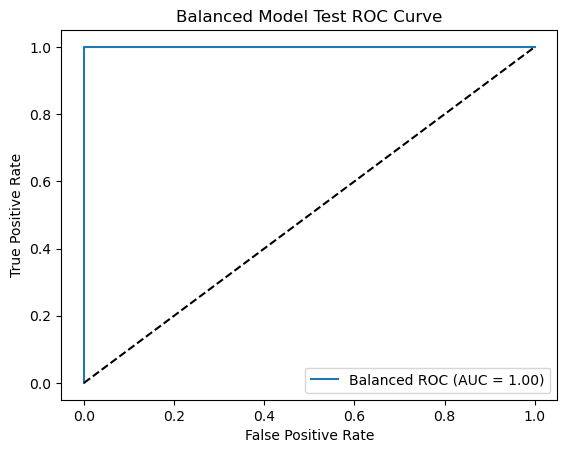

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# ------------------------------
# Step 1: Display the imbalance in the original training set
# ------------------------------
print("Original training set sample count:", X_train.shape[0])
print("Number of positive samples:", sum(y_train == 1))
print("Number of negative samples:", sum(y_train == 0))

# ------------------------------
# Step 2: Construct a balanced training set using case-control sampling
# ------------------------------
# Get the indices of positive and negative samples
pos_idx = y_train[y_train == 1].index
neg_idx = y_train[y_train == 0].index

# Count of positive samples
n_pos = len(pos_idx)

# Randomly select an equal number of negative samples without replacement
np.random.seed(42)  # for reproducibility
neg_sample_idx = np.random.choice(neg_idx, size=n_pos, replace=False)

# Create a balanced training set
X_train_balanced = pd.concat([X_train.loc[pos_idx], X_train.loc[neg_sample_idx]])
y_train_balanced = pd.concat([y_train.loc[pos_idx], y_train.loc[neg_sample_idx]])

print("Balanced training set sample count:", X_train_balanced.shape[0])
print("Number of positive samples (balanced):", sum(y_train_balanced == 1))
print("Number of negative samples (balanced):", sum(y_train_balanced == 0))

# ------------------------------
# Step 3: Train a logistic regression model on the balanced training set
# ------------------------------
model_balanced = LogisticRegression(max_iter=1000)
model_balanced.fit(X_train_balanced, y_train_balanced)

# ------------------------------
# Step 4: Evaluate the balanced model on the test set
# ------------------------------
# X_test_final and y_test_final were extracted using 3 parts like in the training set
y_test_pred_balanced = model_balanced.predict(X_test_final)
y_test_prob_balanced = model_balanced.predict_proba(X_test_final)[:, 1]  # probability for the positive class

# Calculate evaluation metrics
test_accuracy_balanced = accuracy_score(y_test_final, y_test_pred_balanced)
cm_test_balanced = confusion_matrix(y_test_final, y_test_pred_balanced)
auc_test_balanced = roc_auc_score(y_test_final, y_test_prob_balanced)

print("Balanced model test accuracy:", test_accuracy_balanced)
print("Balanced model test confusion matrix:")
print(cm_test_balanced)
print("Balanced model test AUC:", auc_test_balanced)

# Plot ROC curve for the balanced model
fpr_bal, tpr_bal, _ = roc_curve(y_test_final, y_test_prob_balanced)
plt.figure()
plt.plot(fpr_bal, tpr_bal, label=f'Balanced ROC (AUC = {auc_test_balanced:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Balanced Model Test ROC Curve')
plt.legend(loc="lower right")
plt.show()


Train Accuracy: 1.0
Confusion Matrix on Train Data:
[[60  0]
 [ 0  8]]
AUC on Train Data: 1.0


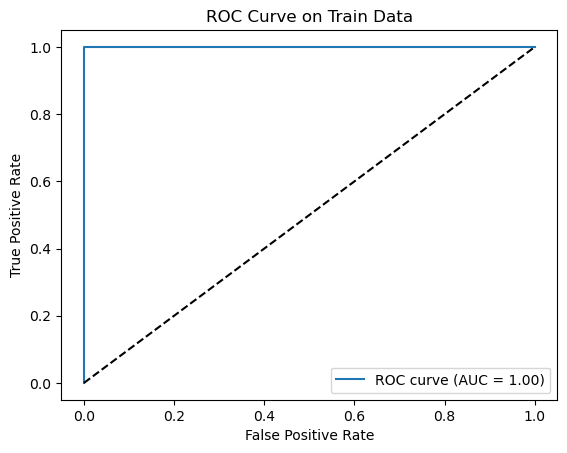

In [ ]:
X_train_list = []
y_train_list = []
for df in train_data_digitized:
    features_df = split_and_extract_features(df, 3) 
    if pd.isna(features_df['label'].iloc[0]):
        continue
    X_train_list.append(features_df.drop(columns=['label'], errors='ignore'))
    y_train_list.append(features_df['label'].iloc[0])

X_train = pd.concat(X_train_list, axis=0, ignore_index=True)
y_train = pd.Series(y_train_list)

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np

model = LogisticRegression(max_iter=1000)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
pipeline = Pipeline([('feature_selection', rfecv), ('model', model)])
pipeline.fit(X_train, y_train)

y_pred_train = pipeline.predict(X_train)
y_prob_train = pipeline.predict_proba(X_train)[:, 1]

print("Train Accuracy:", np.mean(y_pred_train == y_train))


from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# confusion matrix
cm = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix on Train Data:")
print(cm)

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)
auc_value = roc_auc_score(y_train, y_prob_train)
print("AUC on Train Data:", auc_value)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Train Data')
plt.legend(loc="lower right")
plt.show()

(b) Binary Classification Using L1-penalized logistic regression

i. Repeat 2(a)iii using L1-penalized logistic regression, i.e. instead of using p-
values for variable selection, use L1 regularization.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize variables to store the best parameters and score
best_score = 0
best_l, best_C = 0, 0

# Define a range of values for l and C
l_values = range(1, 21)  # Number of segments
C_values = np.logspace(-3, 3, 7)  # Regularization strength (C = 1 / λ)

# Iterate over l values
for l in l_values:
    # Extract features for l segments
    X_list = []
    y_list = []
    for df in train_data_digitized:
        features_df = split_and_extract_features(df, l)
        if pd.isna(features_df['label'].iloc[0]):
            continue  # Skip if no valid label
        X_list.append(features_df.drop(columns=['label'], errors='ignore'))
        y_list.append(features_df['label'].iloc[0])
    
    X = pd.concat(X_list, axis=0, ignore_index=True)
    y = pd.Series(y_list)
    
    # Skip if only one class exists
    if len(y.unique()) < 2:
        print(f"Skipping l={l} (single class)")
        continue
    
    # Standardize the features
    X_scaled = scaler.fit_transform(X)
    
    # Cross-validate for C using GridSearchCV
    model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
    param_grid = {'C': C_values}
    grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(5), scoring='accuracy')
    grid_search.fit(X_scaled, y)
    
    # Get the best C and corresponding accuracy
    best_C_for_l = grid_search.best_params_['C']
    best_score_for_l = grid_search.best_score_
    
    print(f"l={l}, Best C={best_C_for_l:.3f}, Accuracy={best_score_for_l:.3f}")
    
    # Update the best parameters if this l gives a better score
    if best_score_for_l > best_score:
        best_score = best_score_for_l
        best_l = l
        best_C = best_C_for_l

print(f"Best parameters: l={best_l}, C={best_C}, Accuracy={best_score:.3f}")


l=1, Best C=1.000, Accuracy=0.971
l=2, Best C=1.000, Accuracy=0.942
l=3, Best C=1.000, Accuracy=0.970
l=4, Best C=1.000, Accuracy=0.942
l=5, Best C=10.000, Accuracy=0.956
l=6, Best C=1.000, Accuracy=0.956
l=7, Best C=10.000, Accuracy=0.956
l=8, Best C=1.000, Accuracy=0.912
l=9, Best C=1.000, Accuracy=0.956
l=10, Best C=1.000, Accuracy=0.956
l=11, Best C=100.000, Accuracy=0.956
l=12, Best C=10.000, Accuracy=0.970
l=13, Best C=1.000, Accuracy=0.956
l=14, Best C=100.000, Accuracy=0.956
l=15, Best C=100.000, Accuracy=0.956
l=16, Best C=10.000, Accuracy=0.941
l=17, Best C=100.000, Accuracy=0.956
l=18, Best C=10.000, Accuracy=0.970
l=19, Best C=10.000, Accuracy=0.956
l=20, Best C=100.000, Accuracy=0.970
Best parameters: l=1, C=1.0, Accuracy=0.971


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, 

Test Accuracy: 0.9473684210526315
Test Confusion Matrix:
[[15  0]
 [ 1  3]]
Test AUC: 1.0


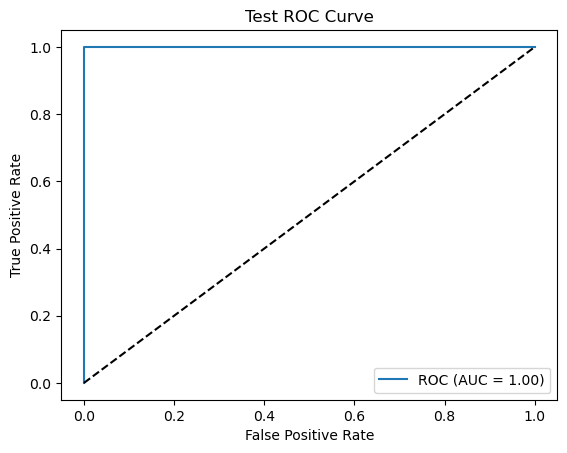

In [146]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Updated split_and_extract_features function using np.array_split to guarantee exactly l segments
def split_and_extract_features_fixed(df, l):
    # Drop non-numeric columns
    df_numeric = df.drop(columns=['time', 'activity', 'label'], errors='ignore')
    # Always split into exactly l parts, even if some parts are empty
    parts = np.array_split(df_numeric, l)
    features = {}
    for i, part in enumerate(parts):
        # If a segment is empty, fill in NaN for each expected statistic for each column
        if part.empty:
            for col in df_numeric.columns:
                for stat in ['min', 'max', 'mean', 'median', 'std', '1st_quantile', '3rd_quantile']:
                    features[f'{col}_{stat}_part{i+1}'] = np.nan
        else:
            for col in part.columns:
                features[f'{col}_min_part{i+1}'] = part[col].min()
                features[f'{col}_max_part{i+1}'] = part[col].max()
                features[f'{col}_mean_part{i+1}'] = part[col].mean()
                features[f'{col}_median_part{i+1}'] = part[col].median()
                features[f'{col}_std_part{i+1}'] = part[col].std()
                features[f'{col}_1st_quantile_part{i+1}'] = part[col].quantile(0.25)
                features[f'{col}_3rd_quantile_part{i+1}'] = part[col].quantile(0.75)
    extracted_features = pd.DataFrame([features])
    # Safely assign the label if available
    if 'label' in df.columns and len(df['label']) > 0:
        extracted_features['label'] = df['label'].iloc[0]
    else:
        extracted_features['label'] = np.nan
    return extracted_features

# ------------------------------
# Assume train_data_digitized has already been created as in your previous code.
# Set the desired number of segments, e.g., l = 3.
desired_l = best_l  

# Build training set features using the fixed function
X_train_list = []
y_train_list = []
for df in train_data_digitized:
    features_df = split_and_extract_features_fixed(df, desired_l)
    if pd.isna(features_df['label'].iloc[0]):
        continue
    X_train_list.append(features_df.drop(columns=['label'], errors='ignore'))
    y_train_list.append(features_df['label'].iloc[0])
X_train = pd.concat(X_train_list, axis=0, ignore_index=True)
y_train = pd.Series(y_train_list)

# Build test set features using the same desired number of segments
# Assume test_data_digitized is similarly created for the test set.
X_test_list = []
y_test_list = []
for df in test_data_digitized:
    features_df = split_and_extract_features_fixed(df, desired_l)
    if pd.isna(features_df['label'].iloc[0]):
        continue
    X_test_list.append(features_df.drop(columns=['label'], errors='ignore'))
    y_test_list.append(features_df['label'].iloc[0])
X_test = pd.concat(X_test_list, axis=0, ignore_index=True)
y_test = pd.Series(y_test_list)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)  # preserve feature names
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)  # force test to have same columns

# Train a final logistic regression model (for example, with L1 penalty)
final_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)
final_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_test_pred = final_model.predict(X_test_scaled)
y_test_prob = final_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, y_test_prob)

print("Test Accuracy:", test_accuracy)
print("Test Confusion Matrix:")
print(cm_test)
print("Test AUC:", auc_test)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve')
plt.legend(loc='lower right')
plt.show()


L1-penalized logistic regression tends to perform better because it automatically handles feature selection and regularization in a unified framework; it is less sensitive to multicollinearity and irrelevant features; and it is more robust to overfitting, especially when the number of features is large relative to the number of samples.  
L1-penalized logistic regression is easier to implement because it integrates feature selection and model training into a single step; it does not require manual feature selection or p-value thresholding; and libraries like scikit-learn provide built-in support for L1 regularization and cross-validation.

(c) Multi-class Classification (The Realistic Case)

i. Find the best l in the same way as you found it in 2(b)i to build an L1-
penalized multinomial regression model to classify all activities in your train-
ing set.

/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_98848/3672671871.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['activity'].map(global_mapping)
/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_98848/3672671871.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['activity'].map(global_mapping)
/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_98848/3672671871.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

l = 1, Best C = 10, Accuracy = 0.881


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 2, Best C = 100, Accuracy = 0.868


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 3, Best C = 100, Accuracy = 0.822


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 4, Best C = 100, Accuracy = 0.837


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 5, Best C = 10, Accuracy = 0.837


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 6, Best C = 1, Accuracy = 0.809


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 7, Best C = 1, Accuracy = 0.808


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 8, Best C = 100, Accuracy = 0.792


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 9, Best C = 100, Accuracy = 0.808


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 10, Best C = 1, Accuracy = 0.778


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 11, Best C = 100, Accuracy = 0.807


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 12, Best C = 1, Accuracy = 0.752


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 13, Best C = 100, Accuracy = 0.748


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 14, Best C = 100, Accuracy = 0.808


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 15, Best C = 100, Accuracy = 0.791


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 16, Best C = 100, Accuracy = 0.792


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 17, Best C = 100, Accuracy = 0.776


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 18, Best C = 100, Accuracy = 0.792


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 19, Best C = 100, Accuracy = 0.777


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. 

l = 20, Best C = 1, Accuracy = 0.780

Best parameters: l = 1, C = 10, Accuracy = 0.881
Test Accuracy (Multiclass): 0.8947368421052632
Test Confusion Matrix:
[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]


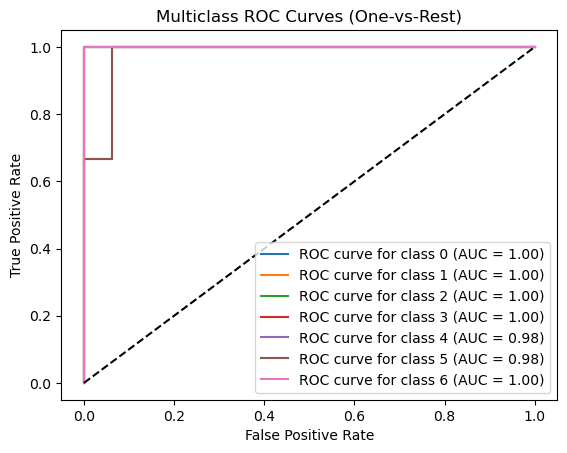

In [151]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, label_binarize
import matplotlib.pyplot as plt

# ------------------------------
# Preprocess the Data
# ------------------------------
# Clean training and test data
train_data_clean = [df.dropna() for df in train_data]
test_data_clean = [df.dropna() for df in test_data]

# Build a global mapping for activities based on all training data
all_activities = sorted({activity for df in train_data_clean for activity in df['activity'].unique()})
global_mapping = {activity: i for i, activity in enumerate(all_activities)}

def digitize_labels_multiclass(df):
    # Use the global mapping so that labels are consistent across instances
    df['label'] = df['activity'].map(global_mapping)
    return df

train_data_multiclass = [digitize_labels_multiclass(df) for df in train_data_clean]
test_data_multiclass = [digitize_labels_multiclass(df) for df in test_data_clean]

# ------------------------------
# Feature Extraction Functions
# ------------------------------
def extract_features(df):
    features = {}
    for col in df.columns:
        if col not in ['time', 'activity', 'label']:
            features[f'{col}_min'] = df[col].min()
            features[f'{col}_max'] = df[col].max()
            features[f'{col}_mean'] = df[col].mean()
            features[f'{col}_median'] = df[col].median()
            features[f'{col}_std'] = df[col].std()
            features[f'{col}_1st_quantile'] = df[col].quantile(0.25)
            features[f'{col}_3rd_quantile'] = df[col].quantile(0.75)
    return features

def split_and_extract_features(df, l):
    # Drop non-numeric columns
    df_numeric = df.drop(columns=['time', 'activity', 'label'], errors='ignore')
    split_len = len(df_numeric) // l
    features = {}
    for i in range(l):
        start_idx = i * split_len
        end_idx = (i + 1) * split_len if i < l - 1 else len(df_numeric)
        df_part = df_numeric.iloc[start_idx:end_idx]
        part_features = extract_features(df_part)
        for key, value in part_features.items():
            features[f'{key}_part{i+1}'] = value
    extracted_features = pd.DataFrame([features])
    # Assign the label using the first row's label (all rows in one instance should have the same activity)
    if 'label' in df.columns and len(df['label']) > 0:
        extracted_features['label'] = df['label'].iloc[0]
    else:
        extracted_features['label'] = np.nan
    return extracted_features

# ------------------------------
# Cross-validate for l and C using L1-penalized Multinomial Logistic Regression
# ------------------------------
best_score = 0
best_l = 0
best_C = None
best_model = None

# Candidate values for C (inverse regularization strength)
candidate_C = [0.01, 0.1, 1, 10, 100]

# We will try l values from 1 to 20.
scaler = StandardScaler()  # Will be used to standardize features
for l in range(1, 21):
    X_list = []
    y_list = []
    for df in train_data_multiclass:
        features_df = split_and_extract_features(df, l)
        if pd.isna(features_df['label'].iloc[0]):
            continue
        X_list.append(features_df.drop(columns=['label'], errors='ignore'))
        y_list.append(features_df['label'].iloc[0])
    if len(X_list) == 0:
        continue
    X = pd.concat(X_list, axis=0, ignore_index=True)
    y = pd.Series(y_list)
    
    # Check if more than one class is present across instances
    if len(np.unique(y)) < 2:
        print(f"Skipping l={l} (single class)")
        continue
    
    # Standardize features
    X_scaled = scaler.fit_transform(X)
    
    # Set up a multinomial logistic regression model with L1 penalty.
    # Use solver='saga' which supports L1 penalty for multinomial logistic regression.
    model = LogisticRegression(multi_class='multinomial', penalty='l1', solver='saga', max_iter=1000)
    
    param_grid = {'C': candidate_C}
    cv = StratifiedKFold(n_splits=5)
    grid = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv)
    grid.fit(X_scaled, y)
    
    avg_score = grid.best_score_
    print(f"l = {l}, Best C = {grid.best_params_['C']}, Accuracy = {avg_score:.3f}")
    
    if avg_score > best_score:
        best_score = avg_score
        best_l = l
        best_C = grid.best_params_['C']
        best_model = grid.best_estimator_

print(f"\nBest parameters: l = {best_l}, C = {best_C}, Accuracy = {best_score:.3f}")

# ------------------------------
# Train the Final Model using the best l and C on the full training set
# ------------------------------
X_train_list = []
y_train_list = []
for df in train_data_multiclass:
    features_df = split_and_extract_features(df, best_l)
    if pd.isna(features_df['label'].iloc[0]):
        continue
    X_train_list.append(features_df.drop(columns=['label'], errors='ignore'))
    y_train_list.append(features_df['label'].iloc[0])
X_train_final = pd.concat(X_train_list, axis=0, ignore_index=True)
y_train_final = pd.Series(y_train_list)
X_train_scaled = scaler.fit_transform(X_train_final)

final_model = LogisticRegression(multi_class='multinomial', penalty='l1', solver='saga',
                                 C=best_C, max_iter=1000)
final_model.fit(X_train_scaled, y_train_final)

# ------------------------------
# Evaluate the Final Model on the Test Set
# ------------------------------
X_test_list = []
y_test_list = []
for df in test_data_multiclass:
    features_df = split_and_extract_features(df, best_l)
    if pd.isna(features_df['label'].iloc[0]):
        continue
    X_test_list.append(features_df.drop(columns=['label'], errors='ignore'))
    y_test_list.append(features_df['label'].iloc[0])
X_test_final = pd.concat(X_test_list, axis=0, ignore_index=True)
y_test_final = pd.Series(y_test_list)
X_test_scaled = scaler.transform(X_test_final)

y_test_pred = final_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test_final, y_test_pred)
print("Test Accuracy (Multiclass):", test_accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test_final, y_test_pred)
print("Test Confusion Matrix:")
print(cm)

# ------------------------------
# ROC Curves for Multi-class Classification
# ------------------------------
# For multiclass ROC, we use the One-vs-Rest approach.
classes = np.unique(y_train_final)
y_test_binarized = label_binarize(y_test_final, classes=classes)
y_score = final_model.predict_proba(X_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {i} (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()


Gaussian NB Test Accuracy: 0.7368421052631579
Gaussian NB Test Confusion Matrix:
[[2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 2 0 0 0 1]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]


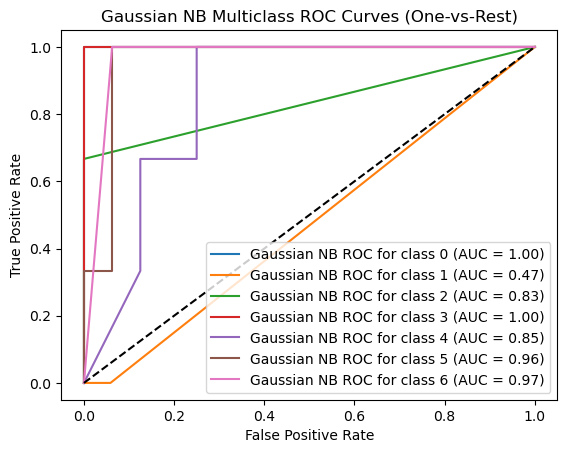

Multinomial NB Test Accuracy: 0.7894736842105263
Multinomial NB Test Confusion Matrix:
[[2 0 0 0 0 0 0]
 [1 1 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 1 1 1 0]
 [0 0 0 0 0 0 3]]


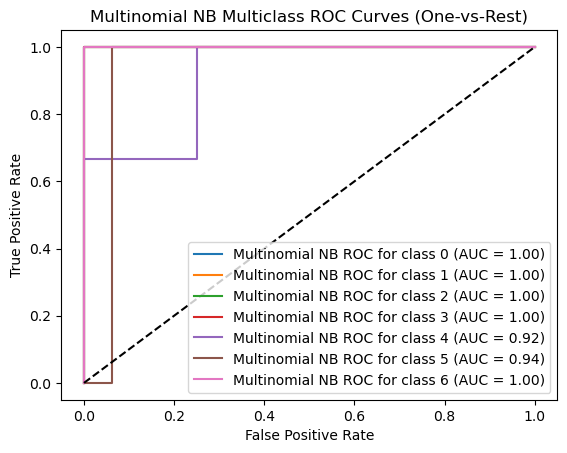

In [149]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize
import matplotlib.pyplot as plt

# Assume the following functions are already defined:
# - digitize_labels_multiclass(df): uses a global mapping for activities.
# - split_and_extract_features(df, l): extracts features by splitting each time series into l segments.
# Also assume that train_data_multiclass and test_data_multiclass (lists of DataFrames) are ready.
# And best_l is defined (e.g. best_l = 3) from part (c)i.

# For this example, if best_l is not defined, set it to a default (say 3)
best_l = 3  # you can replace this with the best l from your previous cross-validation

# ------------------------------
# Build Training Set Features
# ------------------------------
X_train_list = []
y_train_list = []
for df in train_data_multiclass:
    features_df = split_and_extract_features(df, best_l)
    if pd.isna(features_df['label'].iloc[0]):
        continue
    X_train_list.append(features_df.drop(columns=['label'], errors='ignore'))
    y_train_list.append(features_df['label'].iloc[0])
X_train = pd.concat(X_train_list, axis=0, ignore_index=True)
y_train = pd.Series(y_train_list)

# Build Test Set Features
X_test_list = []
y_test_list = []
for df in test_data_multiclass:
    features_df = split_and_extract_features(df, best_l)
    if pd.isna(features_df['label'].iloc[0]):
        continue
    X_test_list.append(features_df.drop(columns=['label'], errors='ignore'))
    y_test_list.append(features_df['label'].iloc[0])
X_test = pd.concat(X_test_list, axis=0, ignore_index=True)
y_test = pd.Series(y_test_list)

# ------------------------------------
# Gaussian Naïve Bayes
# ------------------------------------
# For GaussianNB, we standardize the features.
scaler_gauss = StandardScaler()
X_train_gauss = scaler_gauss.fit_transform(X_train)
X_test_gauss = scaler_gauss.transform(X_test)

gauss_nb = GaussianNB()
gauss_nb.fit(X_train_gauss, y_train)
y_pred_gauss = gauss_nb.predict(X_test_gauss)
y_prob_gauss = gauss_nb.predict_proba(X_test_gauss)

acc_gauss = accuracy_score(y_test, y_pred_gauss)
cm_gauss = confusion_matrix(y_test, y_pred_gauss)
print("Gaussian NB Test Accuracy:", acc_gauss)
print("Gaussian NB Test Confusion Matrix:")
print(cm_gauss)

# For multiclass ROC curves, we use one-vs-rest (if desired)
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
fpr_gauss = dict()
tpr_gauss = dict()
roc_auc_gauss = dict()
for i in range(len(classes)):
    fpr_gauss[i], tpr_gauss[i], _ = roc_curve(y_test_bin[:, i], y_prob_gauss[:, i])
    roc_auc_gauss[i] = auc(fpr_gauss[i], tpr_gauss[i])

plt.figure()
for i in range(len(classes)):
    plt.plot(fpr_gauss[i], tpr_gauss[i], label=f'Gaussian NB ROC for class {i} (AUC = {roc_auc_gauss[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian NB Multiclass ROC Curves (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()


# ------------------------------------
# Multinomial Naïve Bayes
# ------------------------------------
# MultinomialNB expects nonnegative features. We therefore use the raw features,
# and shift them if necessary. We'll compute the minimum value from the training set
# and add a constant offset to both training and test features.
min_val = X_train.min().min()
if min_val < 0:
    offset = -min_val
    X_train_mnb = X_train + offset
    X_test_mnb = X_test + offset
else:
    X_train_mnb = X_train.copy()
    X_test_mnb = X_test.copy()

# Note: MultinomialNB typically expects integer/count features. Our continuous features may not be ideal,
# but we can still run it for comparison.
mult_nb = MultinomialNB()
mult_nb.fit(X_train_mnb, y_train)
y_pred_mult = mult_nb.predict(X_test_mnb)
y_prob_mult = mult_nb.predict_proba(X_test_mnb)

acc_mult = accuracy_score(y_test, y_pred_mult)
cm_mult = confusion_matrix(y_test, y_pred_mult)
print("Multinomial NB Test Accuracy:", acc_mult)
print("Multinomial NB Test Confusion Matrix:")
print(cm_mult)

# ROC curves for Multinomial NB (One-vs-Rest)
fpr_mult = dict()
tpr_mult = dict()
roc_auc_mult = dict()
for i in range(len(classes)):
    fpr_mult[i], tpr_mult[i], _ = roc_curve(y_test_bin[:, i], y_prob_mult[:, i])
    roc_auc_mult[i] = auc(fpr_mult[i], tpr_mult[i])

plt.figure()
for i in range(len(classes)):
    plt.plot(fpr_mult[i], tpr_mult[i], label=f'Multinomial NB ROC for class {i} (AUC = {roc_auc_mult[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multinomial NB Multiclass ROC Curves (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()


iii. Which method is better for multi-class classification in this problem?

Based on the comparison, Multinomial Naive Bayes (NB) is the better choice for this multi-class classification problem. It achieves higher test accuracy (78.95% vs. 73.68%), fewer misclassifications, and perfect AUC for most classes, indicating superior performance over Gaussian NB. Multinomial NB is particularly effective for discrete or categorical data, making it the preferred method for this task. If features are continuous, consider discretizing them or exploring other models like L1-penalized logistic regression for further improvements.

3. ISLR 4.8.3

### **Proof that the Bayes Classifier is Quadratic**

To prove that the Bayes classifier is **quadratic** (not linear) when each class has its own variance ($\sigma_k^2$), we analyze the discriminant function $\delta_k(x)$ for the $k$-th class. The discriminant function is derived from the log-posterior probability $\log(p_k(x))$, where $p_k(x)$ is the posterior probability of class $k$ given $x$.

---

#### **Step 1: Density Function for Each Class**
For the $k$-th class, the density function $f_k(x)$ is given by the one-dimensional normal distribution:
$$
f_k(x) = \frac{1}{\sqrt{2\pi}\sigma_k} \exp\left(-\frac{(x - \mu_k)^2}{2\sigma_k^2}\right),
$$
where:
- $\mu_k$ is the mean of the $k$-th class,
- $\sigma_k^2$ is the variance of the $k$-th class.

---

#### **Step 2: Posterior Probability**
The posterior probability $p_k(x)$ is:
$$
p_k(x) = \frac{\pi_k f_k(x)}{\sum_{l=1}^K \pi_l f_l(x)},
$$
where $\pi_k$ is the prior probability of class $k$.

---

#### **Step 3: Discriminant Function**
To classify an observation $x$, we assign it to the class $k$ that maximizes the log-posterior probability:
$$
\delta_k(x) = \log(\pi_k) + \log(f_k(x)).
$$
Substituting $f_k(x)$ into the equation:
$$
\delta_k(x) = \log(\pi_k) - \frac{1}{2}\log(2\pi) - \log(\sigma_k) - \frac{(x - \mu_k)^2}{2\sigma_k^2}.
$$
Simplifying, we get:
$$
\delta_k(x) = -\frac{(x - \mu_k)^2}{2\sigma_k^2} - \log(\sigma_k) + \log(\pi_k) + C,
$$
where $C = -\frac{1}{2}\log(2\pi)$ is a constant that does not depend on $k$.

---

#### **Step 4: Quadratic Nature of $\delta_k(x)$**
Expanding $(x - \mu_k)^2$:
$$
\delta_k(x) = -\frac{x^2 - 2x\mu_k + \mu_k^2}{2\sigma_k^2} - \log(\sigma_k) + \log(\pi_k) + C.
$$
Rearranging terms:
$$
\delta_k(x) = -\frac{x^2}{2\sigma_k^2} + \frac{x\mu_k}{\sigma_k^2} - \frac{\mu_k^2}{2\sigma_k^2} - \log(\sigma_k) + \log(\pi_k) + C.
$$
This is a **quadratic function** of $x$ because it contains a term $x^2$ (quadratic term) and a term $x$ (linear term).

---

#### **Step 5: Bayes Decision Boundary**
The Bayes decision boundary between two classes $k$ and $l$ is found by solving $\delta_k(x) = \delta_l(x)$. Substituting the expressions for $\delta_k(x)$ and $\delta_l(x)$:
$$
-\frac{x^2}{2\sigma_k^2} + \frac{x\mu_k}{\sigma_k^2} - \frac{\mu_k^2}{2\sigma_k^2} - \log(\sigma_k) + \log(\pi_k) = -\frac{x^2}{2\sigma_l^2} + \frac{x\mu_l}{\sigma_l^2} - \frac{\mu_l^2}{2\sigma_l^2} - \log(\sigma_l) + \log(\pi_l).
$$
This equation is **quadratic** in $x$ because it contains $x^2$ terms. Therefore, the decision boundary is **quadratic**.

---

#### **Conclusion**
When each class has its own variance ($\sigma_k^2$), the discriminant function $\delta_k(x)$ is quadratic in $x$. This proves that the Bayes classifier is **quadratic** (not linear) in this case. The quadratic nature arises because the $x^2$ term in $\delta_k(x)$ cannot be eliminated when $\sigma_k^2$ varies across classes.

4. ISLR 4.8.7

### **Problem Statement**
We wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on $X$, last year’s percent profit. We are given:
- Mean of $X$ for companies that issued a dividend ($\mu_1$): $\mu_1 = 10$
- Mean of $X$ for companies that did not issue a dividend ($\mu_0$): $\mu_0 = 0$
- Variance of $X$ ($\sigma^2$): $\sigma^2 = 36$ (standard deviation $\sigma = 6$)
- Prior probability of issuing a dividend ($P(Y = \text{Yes})$): $P(Y = \text{Yes}) = 0.8$
- Prior probability of not issuing a dividend ($P(Y = \text{No})$): $P(Y = \text{No}) = 0.2$
- Observed value of $X$: $X = 4$

We assume $X$ follows a normal distribution and use **Bayes' theorem** to predict the probability that a company will issue a dividend given $X = 4$.

---

### **Step 1: Likelihoods**
The likelihood of $X = 4$ given that the company issued a dividend ($Y = \text{Yes}$) is:
$$
f(X = 4 \mid Y = \text{Yes}) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(4 - \mu_1)^2}{2\sigma^2}\right).
$$
Substituting $\mu_1 = 10$ and $\sigma = 6$:
$$
f(X = 4 \mid Y = \text{Yes}) = \frac{1}{\sqrt{72\pi}} \exp\left(-\frac{(4 - 10)^2}{72}\right).
$$
Simplifying:
$$
f(X = 4 \mid Y = \text{Yes}) = \frac{1}{\sqrt{72\pi}} \exp\left(-0.5\right).
$$

The likelihood of $X = 4$ given that the company did not issue a dividend ($Y = \text{No}$) is:
$$
f(X = 4 \mid Y = \text{No}) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(4 - \mu_0)^2}{2\sigma^2}\right).
$$
Substituting $\mu_0 = 0$ and $\sigma = 6$:
$$
f(X = 4 \mid Y = \text{No}) = \frac{1}{\sqrt{72\pi}} \exp\left(-\frac{(4 - 0)^2}{72}\right).
$$
Simplifying:
$$
f(X = 4 \mid Y = \text{No}) = \frac{1}{\sqrt{72\pi}} \exp\left(-\frac{2}{9}\right).
$$

---

### **Step 2: Posterior Probability (Bayes' Theorem)**
Using Bayes' theorem, the posterior probability of issuing a dividend ($Y = \text{Yes}$) given $X = 4$ is:
$$
P(Y = \text{Yes} \mid X = 4) = \frac{f(X = 4 \mid Y = \text{Yes}) \cdot P(Y = \text{Yes})}{f(X = 4 \mid Y = \text{Yes}) \cdot P(Y = \text{Yes}) + f(X = 4 \mid Y = \text{No}) \cdot P(Y = \text{No})}.
$$

Substitute the likelihoods and prior probabilities:
$$
P(Y = \text{Yes} \mid X = 4) = \frac{\frac{1}{\sqrt{72\pi}} \exp(-0.5) \cdot 0.8}{\frac{1}{\sqrt{72\pi}} \exp(-0.5) \cdot 0.8 + \frac{1}{\sqrt{72\pi}} \exp\left(-\frac{2}{9}\right) \cdot 0.2}.
$$

Simplify by canceling $\frac{1}{\sqrt{72\pi}}$:
$$
P(Y = \text{Yes} \mid X = 4) = \frac{\exp(-0.5) \cdot 0.8}{\exp(-0.5) \cdot 0.8 + \exp\left(-\frac{2}{9}\right) \cdot 0.2}.
$$

---

### **Step 3: Numerical Calculation**
Calculate the exponential terms:
$$
\exp(-0.5) \approx 0.6065, \quad \exp\left(-\frac{2}{9}\right) \approx 0.8007.
$$

Substitute these values:
$$
P(Y = \text{Yes} \mid X = 4) = \frac{0.6065 \cdot 0.8}{0.6065 \cdot 0.8 + 0.8007 \cdot 0.2}.
$$
$$
P(Y = \text{Yes} \mid X = 4) = \frac{0.4852}{0.4852 + 0.1601}.
$$
$$
P(Y = \text{Yes} \mid X = 4) = \frac{0.4852}{0.6453} \approx 0.7518.
$$

---

### **Final Answer**
The probability that a company will issue a dividend this year, given that its percentage profit was $X = 4$ last year, is approximately:
$$
P(Y = \text{Yes} \mid X = 4) \approx 75.18\%.
$$